"Хирургия данных"
Легенда: Вы пошли на повышение. Теперь вы не просто аналитик, который смотрит на данные, вы — Data Engineer, который готовит данные для бизнеса. Ваша задача — очистить датасет, создать новые полезные метрики и сегментировать игры для отдела маркетинга.

Правила:

Запрещено использовать циклы for / while. Все задачи решаются через векторизацию и методы Pandas.
Используйте тот же датасет GOG, что и в лекции.

Задание 1: Разминка
Мы готовим отчет для российского офиса. Цены с учетом скилки в датасете указаны в евро (finalAmount), но бухгалтерия требует рубли.

Ваша задача:

Создайте столбец price_rub.
Переведите цену в рубли.
Проверка: Найдите самую дорогую игру в рублях. Выведите её название и цену.

In [3]:
import pandas as pd
gm = pd.read_csv("gog_games_dataset.csv")
import matplotlib.pyplot as plt

In [50]:
# 1евро = 90,72рубл
gm['price_rub'] = gm['finalAmount'] * 90.72
game = gm[['title', 'price_rub']].sort_values('price_rub', ascending=False)
b_game = game.set_index('title')
b_game.reset_index()

print(f"самая дорогая игра {b_game.index[0]}")
print(f"стоимость {b_game['price_rub'].iloc[0]:.2f} рубл")

самая дорогая игра Europa Universalis IV: Ultimate Bundle
стоимость 18143.09 рубл


Задание 2: Сложная фильтрация 🧠
Вам поступил запрос от юридического отдела. ННужно найти игры, которые выглядят подозрительно и требуют ручной проверки модератором. Напишите запрос, чтобы найти игры, соответствующие всем условиям одновременно:

Возрастной рейтинг (ageLimit): строго 18+.
Скидка (discountPercentage): больше 50% (подозрительно дешево для контента 18+).
Рейтинг (overallAvgRating): ниже 3.0 (плохое качество).
Выведите title, ageLimit, discountPercentage, overallAvgRating.

In [ ]:
mask_game = (gm['ageLimit'] >= 18) & (gm['discountPercentage'] > 50) & (gm['overallAvgRating'] < 3)

dark_game = gm.loc[mask_game]
dark_game[['title', 'ageLimit', 'discountPercentage', 'overallAvgRating']]

,title,ageLimit,discountPercentage,overallAvgRating
194,Dying Light - Harran Tactical Unit Bundle,18,74,2.5
717,Wolfenstein II: The Freedom Chronicles - Episo...,18,60,2.7
1159,Succubus - Artbook,18,60,2.4
2066,Love Rhythm,18,74,2.7
2080,Mai and the Legendary Treasure,18,60,2.2
2859,Suffer The Night,18,80,2.9
3059,RE:Destiny,18,60,2.9
3126,Dying Light - Harran Inmate Bundle,18,74,2.6
3438,Project Nightmares Case 36: Henrietta Kedward,18,80,2.8
4374,Agony Soundtrack,18,77,2.0


Задание 3. Сложная фильтрация 2
Маркетинг запускает акцию "Controversial Hits" (Спорные хиты). Это игры, которые либо очень популярны (много отзывов), но имеют средний рейтинг, либо имеют идеальный рейтинг, но мало кому известны.

Найдите игры, которые соответствуют ХОТЯ БЫ ОДНОМУ из условий:

Популярные середнячки: Количество отзывов (reviewCount) > 500 И Рейтинг (overallAvgRating) меньше 4.0.
Скрытые алмазы: Рейтинг (overallAvgRating) равен 5.0 И Количество отзывов (reviewCount) от 10 до 50 (включительно).

In [64]:
mask_hit = ((gm['reviewCount'] > 500) & (gm['overallAvgRating'] < 4)) | ((gm['overallAvgRating'] == 5) & (gm['reviewCount'].between(10, 50)))
controversial_hits = gm.loc[mask_hit]
controversial_hits[['title', 'reviewCount', 'overallAvgRating']]

,title,reviewCount,overallAvgRating
515,Pathfinder: Kingmaker - Enhanced Plus Edition,659,3.6
2398,Fallout 3: Game of the Year Edition,613,3.8
4581,No Man's Sky,2016,3.4
4821,Firewatch,605,3.9
5102,BATTLETECH,704,3.8
5193,Fallout: London,2071,3.7
5924,Mafia III: Definitive Edition,833,3.4
9982,Iron Meat,10,5.0
10478,Cyberpunk 2077,9686,3.8


Задание 4. Сегментация
Нам нужно разбить все игры на ценовые сегменты, чтобы настроить фильтры на сайте.

Если цена равна 0 -> 'Free'
Если цена больше 0, но меньше или равна 10 -> 'Budget'
Если цена больше 10, но меньше или равна 40 -> 'Standard'
Если цена больше 40 -> 'Premium'
В конце выведите value_counts() по новому столбцу, чтобы узнать, сколько игр в каждой категории.

In [65]:
gm['segment'] = 'Standard'
gm.loc[gm['amount'] == 0, 'segment'] = 'Free'
gm.loc[(gm['amount'] > 0) & (gm['amount'] <= 10), 'segment'] = 'Budget'
gm.loc[(gm['amount'] > 10) & (gm['amount'] <= 40), 'segment'] = 'Standard'
gm.loc[gm['amount'] > 40, 'segment'] = 'Premium'

def segmentation(row):
    if row['amount'] == 0:
        return 'Free'
    elif row['amount'] > 0 and row['amount'] <= 10:
        return 'Budget'
    elif row['amount'] > 10 and row['amount'] <= 40:
        return 'Standard'
    else:
        return 'Premium'
    
segment_count = gm['segment'].value_counts()
segment_count 

segment
Budget      7733
Standard    2022
Free         795
Premium      346
Name: count, dtype: int64

Задание 5: Честный рейтинг
Вы заметили проблему: сортировка по overallAvgRating выдает в топе игры с 1 отзывом и оценкой 5.0. Это "Ошибка выжившего".

Задача:

Отфильтруйте датасет: оставьте только те игры, у которых reviewCount больше 50 (отсекаем случайные оценки).
Среди оставшихся найдите Топ-10 самых качественных игр.
Если рейтинги совпадают, выше должна быть та игра, у которой больше отзывов.
Выведите только title, overallAvgRating, reviewCount, price_tier.

In [70]:
reviewCount = 50
honest_rating = gm.query("reviewCount > @reviewCount")
honest_rating[['title', 'overallAvgRating', 'reviewCount', 'segment']].sort_values('overallAvgRating', ascending=False).head(10)


,title,overallAvgRating,reviewCount,segment
4099,The Witcher 3: Wild Hunt - Expansion Pass,4.9,170,Budget
4100,The Witcher 3: Wild Hunt - Free DLC Program,4.9,368,Free
4449,The Witcher 3: Wild Hunt - Blood and Wine,4.9,139,Budget
1531,Quest for Glory 1-5,4.9,195,Budget
2787,OpenTTD,4.9,81,Free
1496,Thief™ 2: The Metal Age,4.9,176,Budget
5790,The Chronicles Of Myrtana: Archolos,4.8,291,Free
6088,Emperor: Rise of the Middle Kingdom,4.8,211,Budget
4553,X-Com: UFO Defense,4.8,146,Budget
3861,SWAT 4: Gold Edition,4.8,624,Budget


Задание 6: Со звёздочкой
Построийти гистограмму .plot(kind='hist') цен на игры. Видите "гребенку" цен?
Как думаете, с чем она связана?

<Axes: title={'center': 'game expensive'}, ylabel='Frequency'>

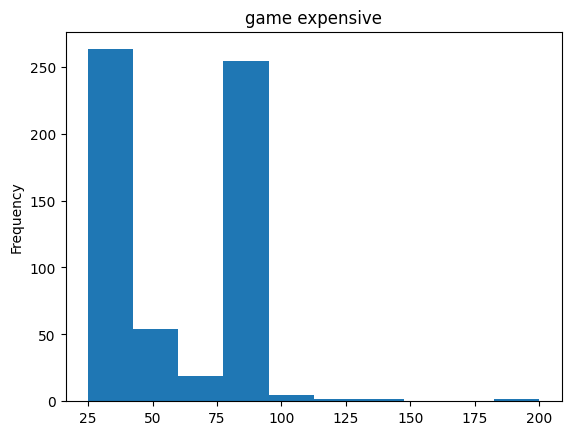

In [22]:
expen_games = gm[gm['finalAmount'] > 25]
# cheap_games = gm[gm['finalAmount'].between(0, 25)]
expen_games['finalAmount'].plot(kind='hist', title='game expensive')


<Axes: title={'center': 'game cheap'}, ylabel='Frequency'>

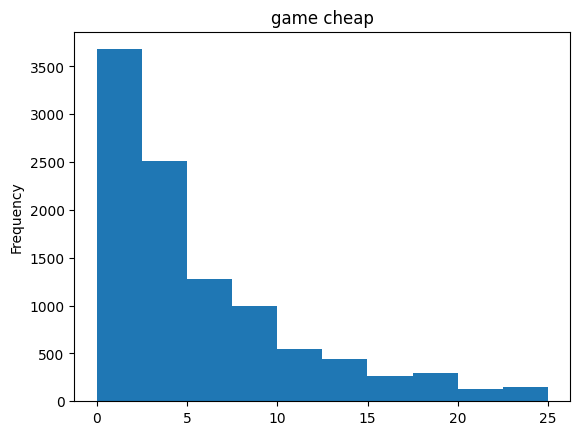

In [23]:
cheap_games = gm[gm['finalAmount'].between(0, 25)]
cheap_games['finalAmount'].plot(kind='hist', title='game cheap')

Больше всего конечно игр более дешевых. Более дорогие игры как правило имеют более высокое качество и требуют больше ресурсов компьютера. Очень дорогие игры могут позволить себе немногие. Кроме того с течением времени, с развитием новых технологий и жанров стоимость игры уменьшается. 
Возможно гребнка связанна с делением игр на разные ценовые сегменты:
- ААА-игры. Выделяют базовое издание (только игра), издание с дополнением (игра и скин) и супер-премиум-издание (игра, скин и сезонный пропуск). Например, у ААА-игр есть базовое издание за 60 долларов, издание за 80 долларов и супер-премиум-издание за 100 долларов. 

- Инди-игры. У инди-игр сложно реализовать более дорогие издания, так как нет такого количества контента. 

- Цифровые издания. Например, есть игры в цифровом формате (Steam), а также коллекционные издания